# Estimating Real Estate Values in Boston Based on a Linear Regression Model

This project focuses on building a multiple linear regression model to predict housing prices in Boston. I evaluated the models using performance metrics and visualizations tailored to understand their predictive capabilities and how well they fit the dataset.

## Dataset Description

For this project, we will use the classic [Boston Housing Price dataset](https://islp.readthedocs.io/en/main/datasets/Boston.html), which is a staple in data analytics and machine learning literature. This dataset contains information on various characteristics of homes in different neighborhoods in Boston, aiming to predict average home prices in those neighborhoods. It was initially published in a 1978 study by Harrison and Rubinfeld, based on data from the 1970 Boston census, and remains widely used in the machine learning community.

The dataset comprises 506 observations and 14 variables, including 13 predictor variables and one target variable (median value of owner-occupied homes).

**Predictors**

`crim`: per capita crime rate by town.

`zn`: proportion of residential land zoned for lots over 25,000 sq.ft.

`indus`: proportion of non-retail business acres per town.

`chas`: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise).

`nox`: nitrogen oxides concentration (parts per 10 million).

`rm`: average number of rooms per dwelling.

`age`: proportion of owner-occupied units built prior to 1940.

`dis`: weighted mean of distances to five Boston employment centres.

`rad`: index of accessibility to radial highways.

`tax`: full-value property-tax rate per $10,000.

`ptratio`: pupil-teacher ratio by town.

`lstat`: lower status of the population (percent).

**Target Variable Description**

`medv`: Median value of owner-occupied homes in $1000s. This is the variable we aim to predict using the other features in the dataset.



## Exploratory Data Analysis

In [1]:
# <><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><> #
# Importing libraries
# <><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><> #

# Standard libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Module to interact with the OS
import os

# Suppress warnings
import warnings
warnings.filterwarnings("ignore")

# Importing ML libraries
import statsmodels.api as sm
import scipy.stats as stats
from statsmodels.formula.api import ols

In [2]:
# File name and directory
file_name = 'boston_housing_dataset.csv'
directory = os.getcwd()

# Full path to the file
full_path = os.path.join(directory, file_name)

# Load the csv file
boston = pd.read_csv(full_path)

In [3]:
# First rows
boston.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


In [4]:
# Last rows
boston.tail()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,6.48,22.0
505,0.04741,0.0,11.93,0,0.573,6.030,80.8,2.5050,1,273,21.0,7.88,11.9


In [5]:
# Shape of the dataset
boston.shape

(506, 13)

In [6]:
# Summary statistics
boston.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


In [7]:
# Data types and non-null values
boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  lstat    506 non-null    float64
 12  medv     506 non-null    float64
dtypes: float64(10), int64(3)
memory usage: 51.5 KB


In [8]:
# Count missing values
boston.isna().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
lstat      0
medv       0
dtype: int64

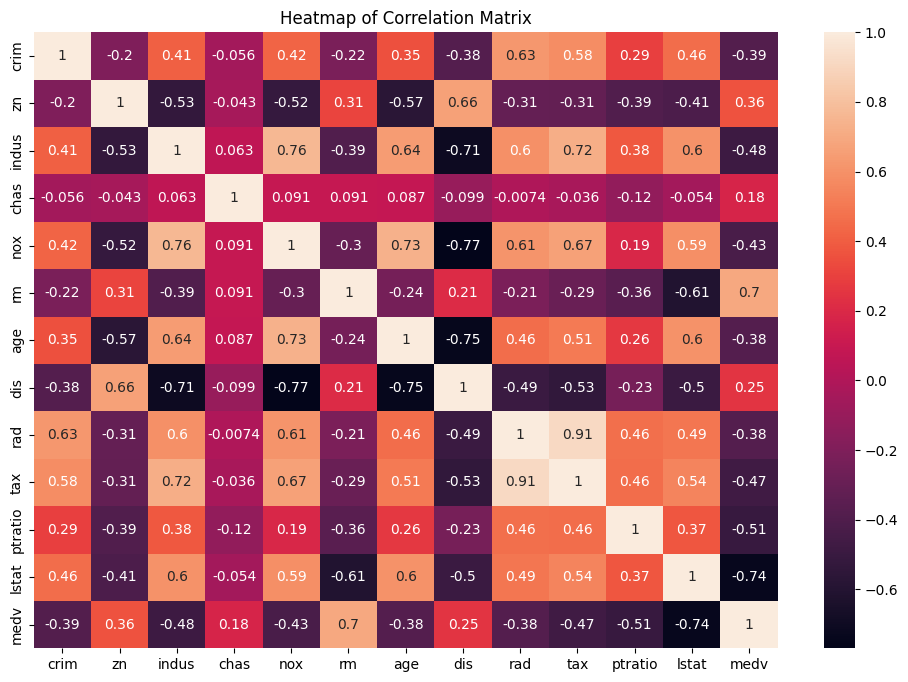

In [9]:
# Correlation matrix
correlation_matrix = boston.corr()

# Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True)
plt.title('Heatmap of Correlation Matrix')
plt.show()

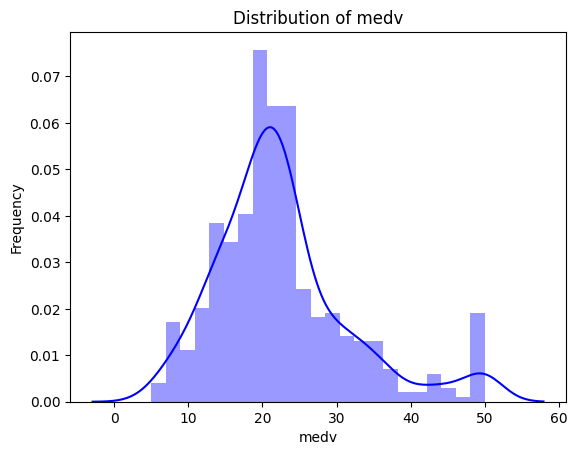

In [10]:
# Distribution of the 'medv' variable
sns.distplot(boston['medv'], kde=True, color='blue')
plt.title('Distribution of medv')
plt.xlabel('medv')
plt.ylabel('Frequency')
plt.show()

## Multiple Linear Regression Implementation

In [11]:
# Define the dependent variable (response)
y = boston['medv']

# Define the independent variables (predictors)
X = boston.drop(columns=['medv'])

# Add a constant to the model (intercept term)
X = sm.add_constant(X)

# Fit the regression model using OLS (Ordinary Least Squares)
model = sm.OLS(y, X).fit()

# Print the summary of the regression model
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.734
Model:                            OLS   Adj. R-squared:                  0.728
Method:                 Least Squares   F-statistic:                     113.5
Date:                Wed, 31 Jul 2024   Prob (F-statistic):          2.23e-133
Time:                        00:09:45   Log-Likelihood:                -1504.9
No. Observations:                 506   AIC:                             3036.
Df Residuals:                     493   BIC:                             3091.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         41.6173      4.936      8.431      0.0

## Analysis of Variance (ANOVA) to assessing the linear regression model

In [12]:
# Get the F-statistic and p-value for the F-test
f_statistic = model.fvalue
p_value_f = model.f_pvalue

print("F-statistic:", f_statistic)
print("p-value for F-test:", p_value_f)

F-statistic: 113.54377426836395
p-value for F-test: 2.2304199237254893e-133


In [13]:
# Perform F tests for each parameter separately
# Create a formula for the model
formula = 'medv ~ ' + ' + '.join(X.columns.difference(['const']))

# Fit the model using the formula
model_formula = ols(formula, data=boston).fit()

# Perform F tests for each coefficient
f_tests = {}
for predictor in X.columns.difference(['const']):
    f_tests[predictor] = model_formula.f_test(f'{predictor} = 0')

# Print the results of the F tests
for predictor, f_test in f_tests.items():
    print(f"F-test for {predictor}:")
    print(f_test.summary())

F-test for age:
<F test: F=0.07337730642015318, p=0.7865948114431672, df_denom=493, df_num=1>
F-test for chas:
<F test: F=10.65586940902896, p=0.00117345808410626, df_denom=493, df_num=1>
F-test for crim:
<F test: F=13.530616737169368, p=0.00026053020557232433, df_denom=493, df_num=1>
F-test for dis:
<F test: F=54.6679665089305, p=6.170894148822306e-13, df_denom=493, df_num=1>
F-test for indus:
<F test: F=0.04696541952808587, p=0.828520054875997, df_denom=493, df_num=1>
F-test for lstat:
<F test: F=118.74054875220205, p=6.39211793941677e-25, df_denom=493, df_num=1>
F-test for nox:
<F test: F=23.721768102056622, p=1.5020730267912827e-06, df_denom=493, df_num=1>
F-test for ptratio:
<F test: F=50.28855713068054, p=4.630166780687303e-12, df_denom=493, df_num=1>
F-test for rad:
<F test: F=18.709234323496055, p=1.843595103858039e-05, df_denom=493, df_num=1>
F-test for rm:
<F test: F=75.77204660494189, p=4.8080245774924126e-17, df_denom=493, df_num=1>
F-test for tax:
<F test: F=11.13226127172

**Interpretation of F-test Results**

The F-test assesses the significance of each individual predictor in the regression model. Below are the interpretations for each predictor based on the F-test results:

- `age` : F=0.0734, p=0.787

The F-value is very low and the p-value is high, indicating that the predictor `age` is not statistically significant. It does not contribute meaningfully to the model.

- `chas`: F=10.656, p=0.00117

The F-value is high and the p-value is very low (less than 0.05), suggesting that `chas` is a significant predictor in the model.

- `crim`: F=13.531, p=0.00026

The F-value is high and the p-value is very low, indicating that `crim` is a significant predictor in the model.

- `dis`: F=54.668, p=6.17e-13

The F-value is very high and the p-value is extremely low, showing that `dis` is a highly significant predictor in the model.

- `indus`: F=0.047, p=0.829

The F-value is very low and the p-value is high, indicating that `indus` is not a significant predictor. It does not add value to the model.

- `lstat`: F=118.741, p=6.39e-25

The F-value is extremely high and the p-value is extremely low, suggesting that `lstat` is a very significant predictor in the model.

- `nox`: F=23.722, p=1.50e-06

The F-value is high and the p-value is very low, indicating that `nox` is a significant predictor in the model.

- `ptratio`: F=50.289, p=4.63e-12

The F-value is very high and the p-value is extremely low, showing that `ptratio` is a highly significant predictor in the model.

- `rad`: F=18.709, p=1.84e-05

The F-value is high and the p-value is very low, indicating that `rad` is a significant predictor in the model.

- `rm`: F=75.772, p=4.81e-17

The F-value is extremely high and the p-value is extremely low, suggesting that `rm` is a very significant predictor in the model.

- `tax`: F=11.132, p=0.00091

The F-value is high and the p-value is low, indicating that `tax` is a significant predictor in the model.

- `zn`: F=11.450, p=0.00077

The F-value is high and the p-value is low, suggesting that `zn` is a significant predictor in the model.

**Summary**

- **Significant Predictors (p < 0.05)**: `chas`, `crim`, `dis`, `lstat`, `nox`, `ptratio`, `rad`, `rm`, `tax`, `zn`.
- **Not Significant Predictors (p > 0.05)**: `age`, `indus`.

These results help determine which predictors significantly impact the dependent variable and which predictors might be excluded to simplify the model without losing substantial explanatory power.

## Assessing and Selecting the Best Model

### k-Fold Cross-Validation Implementation

In [14]:
# Importing necessary libraries
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [15]:
# Prepare the data
X = boston.drop(columns='medv').values  # All columns except 'medv' are predictors
y = boston['medv'].values  # Target variable

def cv_linear_regression(X, y, k):
    """
    Perform k-Fold Cross Validation for multiple linear regression using scikit-learn.
    
    Parameters:
    X (array-like): Design matrix including predictor variables.
    y (array-like): Response variable.
    k (int): Number of folds.
    
    Returns:
    float: Average mean squared error across all folds.
    """
    kf = KFold(n_splits=k, shuffle=True, random_state=42)
    mse_total = 0
    
    for train_index, test_index in kf.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        
        model = LinearRegression().fit(X_train, y_train)
        y_pred = model.predict(X_test)
        
        mse = mean_squared_error(y_test, y_pred)
        mse_total += mse
    
    average_mse = mse_total / k
    return average_mse

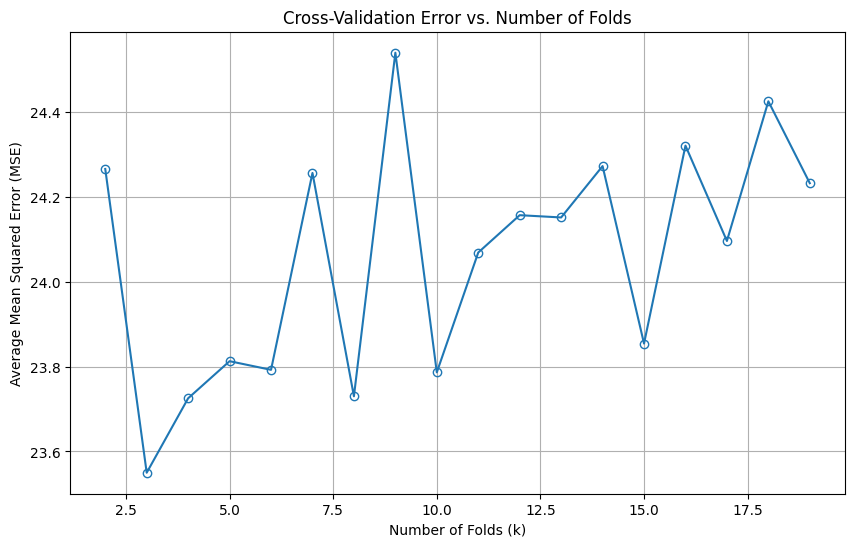

In [16]:
# List to store MSE values for different k
mse_values = []

# Compute the MSE for each value of k from 2 to 19
for k in range(2, 20):
    mse = cv_linear_regression(X, y, k)
    mse_values.append(mse)

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(range(2, 20), mse_values, marker='o', linestyle='-', markerfacecolor='none')
plt.xlabel('Number of Folds (k)')
plt.ylabel('Average Mean Squared Error (MSE)')
plt.title('Cross-Validation Error vs. Number of Folds')
plt.grid(True)
plt.show()

In [17]:
# Get the average MSE for k=10
average_mse = cv_linear_regression(X, y, k=10)
print(f"Average Mean Squared Error (MSE) for k=10: {average_mse}")

Average Mean Squared Error (MSE) for k=10: 23.786371256966344


### Bootstrap Method Implementation

In [18]:
# Importing necessary libraries
from sklearn.utils import resample

In [19]:
def bootstrap_regression(X, y, n_bootstrap=100):
    """
    Perform bootstrap resampling to estimate the coefficients 
    of a multiple linear regression model using scikit-learn.
    
    Parameters:
    X (numpy.ndarray): Array of predictor values.
    y (numpy.ndarray): Array of response values.
    n_bootstrap (int): Number of bootstrap samples to generate.

    Returns:
    np.ndarray: Array of bootstrap coefficient estimates.
    np.ndarray: Array of bootstrap intercept estimates.
    """
    coefs = []
    intercepts = []
    
    for _ in range(n_bootstrap):
        # Generate a bootstrap sample
        X_bootstrap, y_bootstrap = resample(X, y)
        
        # Fit the linear regression model
        model = LinearRegression().fit(X_bootstrap, y_bootstrap)
        
        # Extract the coefficients and intercept
        coef = model.coef_
        intercept = model.intercept_
        
        coefs.append(coef)
        intercepts.append(intercept)
    
    return np.array(coefs), np.array(intercepts)

In [20]:
# Prepare the data
X = boston.drop(columns='medv').values  # All columns except 'medv' are predictors
y = boston['medv'].values  # Target variable

# Perform bootstrap resampling
n_bootstrap_samples = 100
bootstrap_coefs, bootstrap_intercepts = bootstrap_regression(X, y, n_bootstrap_samples)

# Calculate statistics of the bootstrap estimates
coefs_mean = np.mean(bootstrap_coefs, axis=0)
coefs_std = np.std(bootstrap_coefs, axis=0)
intercept_mean = np.mean(bootstrap_intercepts)
intercept_std = np.std(bootstrap_intercepts)

print(f'Bootstrap coefficient means:')
print(f'----------------------------\n')
print(f'{coefs_mean}\n')
print(f'Bootstrap coefficient standard deviations:')
print(f'------------------------------------------\n')
print(f'{coefs_std}\n')
print(f'Bootstrap intercept mean:')
print(f'-------------------------\n')
print(f'{intercept_mean}\n')
print(f'Bootstrap intercept standard deviation:')
print(f'---------------------------------------\n')
print(f'{intercept_std}\n')

Bootstrap coefficient means:
----------------------------

[-1.19321373e-01  4.60958999e-02  1.19031119e-02  3.00268806e+00
 -1.86935957e+01  3.71361047e+00  5.52756886e-03 -1.46621593e+00
  2.92944928e-01 -1.26304605e-02 -9.32250504e-01 -5.56318329e-01]

Bootstrap coefficient standard deviations:
------------------------------------------

[3.66085247e-02 1.54115560e-02 4.97777114e-02 1.20172662e+00
 3.72523797e+00 7.67980501e-01 1.61727735e-02 2.27658668e-01
 6.51314724e-02 2.55994626e-03 1.23226436e-01 9.49708390e-02]

Bootstrap intercept mean:
-------------------------

40.90811675251183

Bootstrap intercept standard deviation:
---------------------------------------

7.1906704225075195



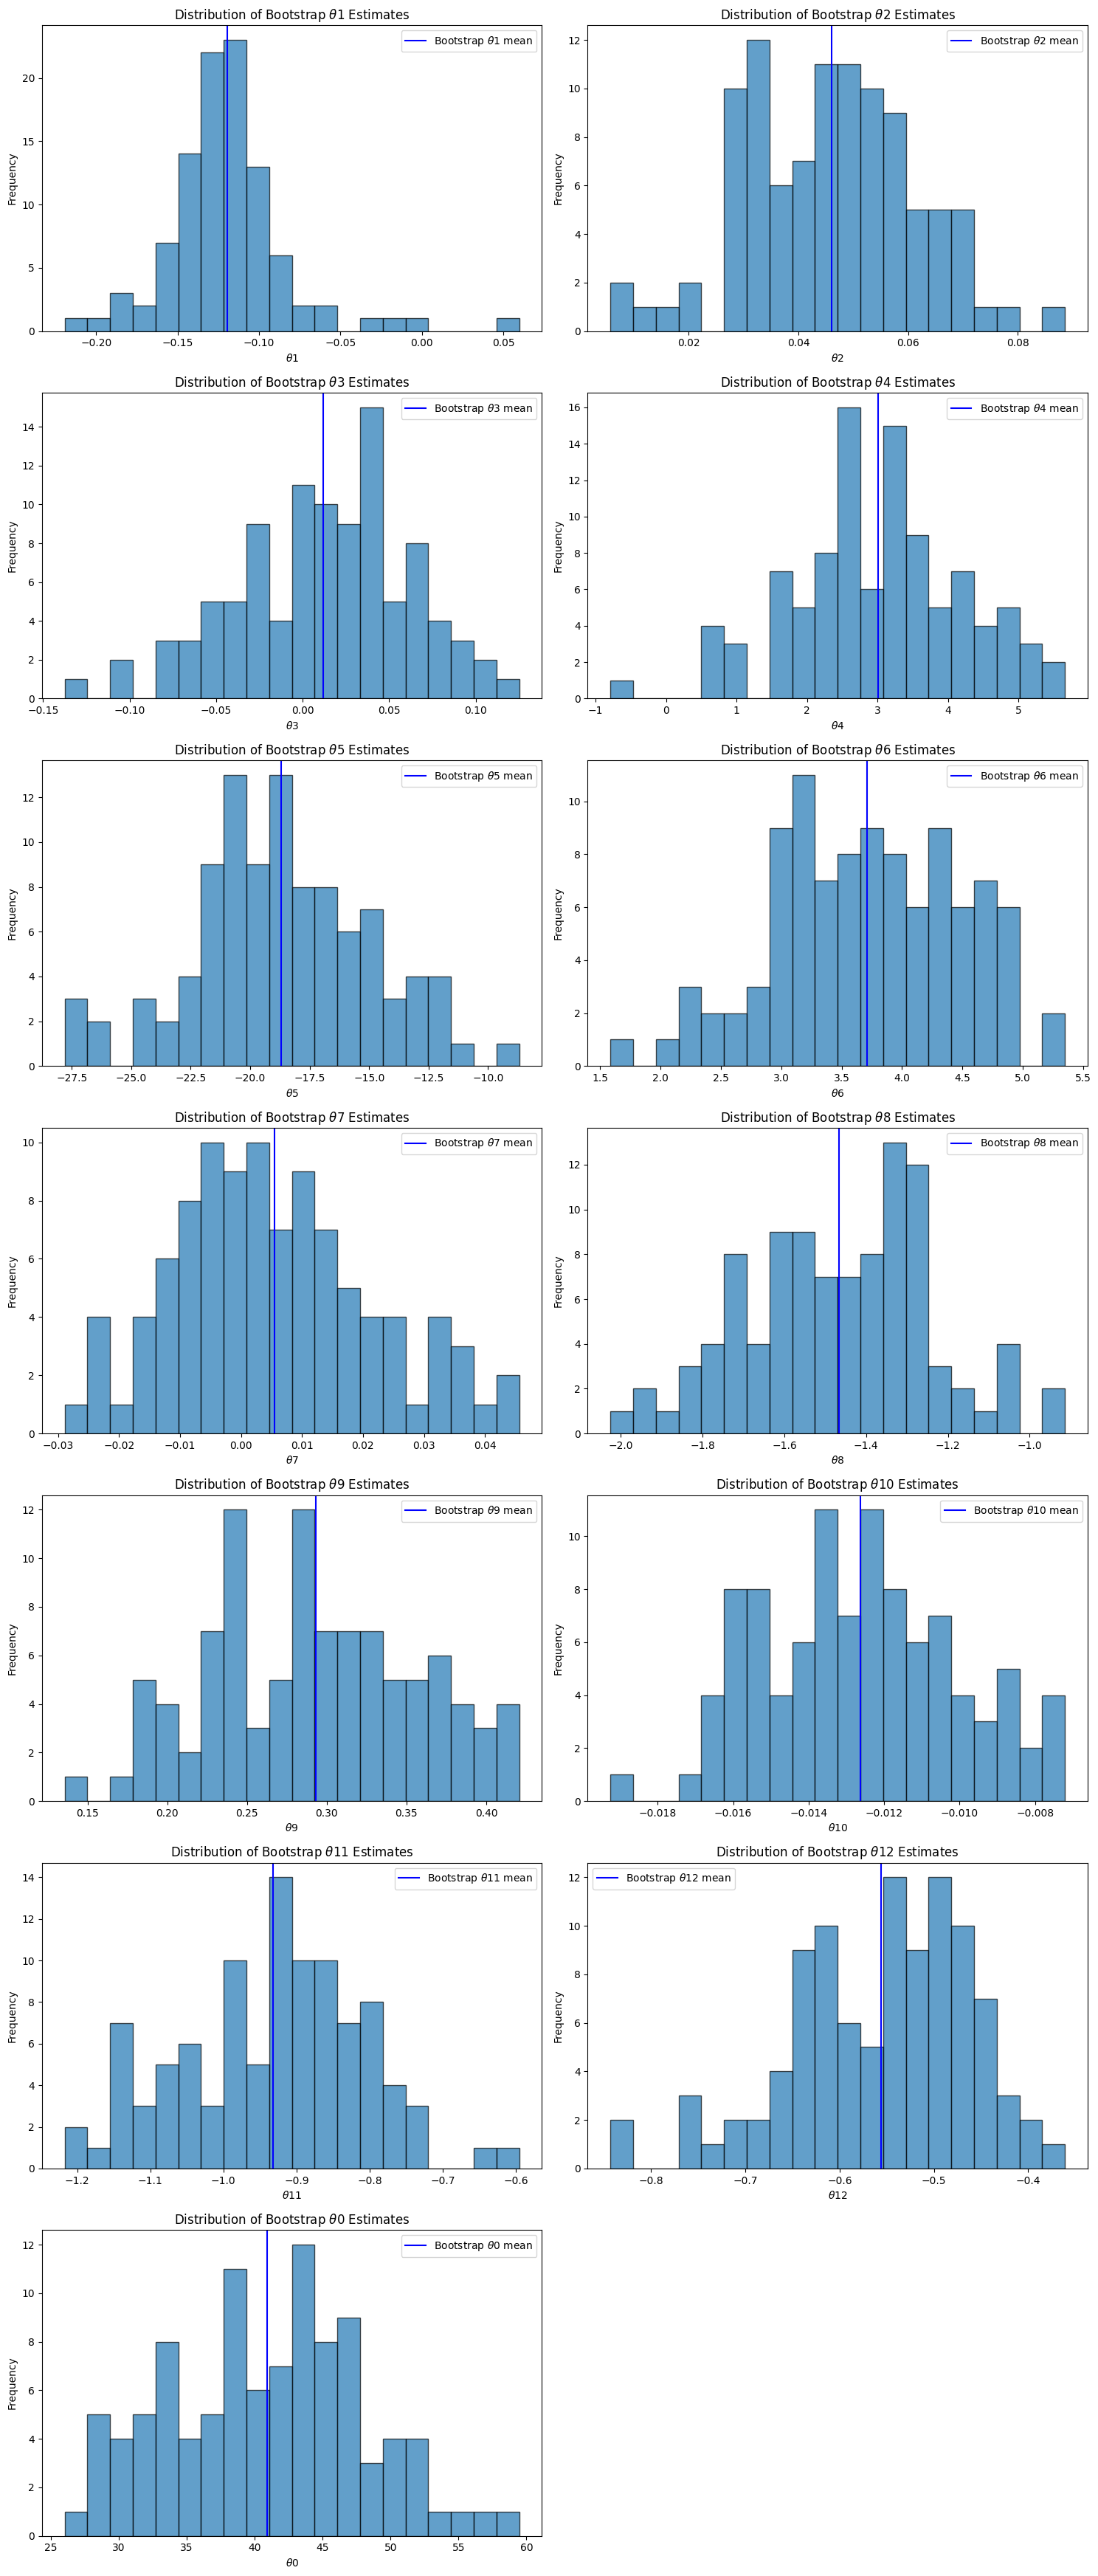

In [21]:
# Plotting the distributions
num_coefs = X.shape[1]
num_rows = (num_coefs + 1) // 2 + 1  # Calculate the number of rows needed

plt.figure(figsize=(15, num_rows * 5))  # Adjust the figure height

# Plot distribution of bootstrap coefficient estimates for each predictor
for i in range(num_coefs):
    plt.subplot(num_rows, 2, i + 1)
    plt.hist(bootstrap_coefs[:, i], bins=20, edgecolor='k', alpha=0.7)
    plt.axvline(x=coefs_mean[i], color='blue', linestyle='-', label=rf'Bootstrap $\theta${i+1} mean')
    plt.title(rf'Distribution of Bootstrap $\theta${i+1} Estimates')
    plt.xlabel(rf'$\theta${i+1}')
    plt.ylabel('Frequency')
    plt.legend()

# Plot distribution of bootstrap intercept estimates
plt.subplot(num_rows, 2, num_coefs + 1)
plt.hist(bootstrap_intercepts, bins=20, edgecolor='k', alpha=0.7)
plt.axvline(x=intercept_mean, color='blue', linestyle='-', label=r'Bootstrap $\theta$0 mean')
plt.title(r'Distribution of Bootstrap $\theta$0 Estimates')
plt.xlabel(r'$\theta$0')
plt.ylabel('Frequency')
plt.legend()

plt.tight_layout()
plt.show()

## References

[**[1]**](https://link.springer.com/book/10.1007/978-3-031-38747-0) Gareth James, Daniela Witten, Trevor Hastie, Robert Tibshirani, et al. An introduction to statistical learning, volume 112. Springer, 2013.

[**[2]**](https://link.springer.com/book/10.1007/978-0-387-21606-5) Trevor Hastie, Robert Tibshirani, Jerome H Friedman, and Jerome H Friedman. The elements of statistical learning: data mining, inference, and prediction, volume 2. Springer, 2009.

[**[3]**](https://link.springer.com/book/10.1007/978-981-15-7877-9) Joe Suzuki and Joe Suzuki. Statistical Learning with Math and Python. Springer, 2021.

[**[4]**](https://books.google.com.ar/books?hl=es&lr=&id=0zjcBQAAQBAJ&oi=fnd&pg=PP1&dq=Ugarte+Probability+and+Statistics+with+R.+CRC+press&ots=6-y3lIT2Hr&sig=fmcj02Q9R2N1jYjRsSnhY19M69o&redir_esc=y#v=onepage&q=Ugarte%20Probability%20and%20Statistics%20with%20R.%20CRC%20press&f=false) Maria Dolores Ugarte, Ana F Militino, and Alan T Arnholt. Probability and Statistics with R. CRC press, 2008.

[**[5]**](https://link.springer.com/article/10.2333/bhmk.12.17_1) Bradley Efron and Robert Tibshirani. The bootstrap method for assessing statistical accuracy. Behaviormetrika, 12(17):1–35, 1985